In [1]:
import pandas as pd
import numpy as np
import os
import json
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_path = "../data/buckets/"
directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
directories

['66c516b1d61c7b572205f713',
 '66c5e9afb11bf5c62a286fe8',
 '66c616da5ea4ebca7f461ac7',
 '66c63f4f7c3e886b7c9cc498',
 '66c63f502b78911af098063d']

In [14]:
activity_dfs = []
survey_dfs = []
documents_dfs = []

for directory in directories:
    # Construct the path to participant_info.json
    file_path_acitivity = os.path.join(base_path, directory, 'activity.csv')
    activity_dfs.append(pd.read_csv(file_path_acitivity))
    
    file_path_survey = os.path.join(base_path, directory, 'survey.csv')
    survey_dfs.append(pd.read_csv(file_path_survey))
    
    file_path_docs = os.path.join(base_path, directory, 'docs.csv')
    documents_dfs.append(pd.read_csv(file_path_docs))
    

In [15]:
master_activity_df = pd.concat(activity_dfs, ignore_index=True)
master_survey_df = pd.concat(survey_dfs, ignore_index=True)
master_documents_df = pd.concat(documents_dfs, ignore_index=True)

In [5]:
task_name_mapping = {
    ("66c516b1d61c7b572205f713", "main_task_1"): "EN",
    ("66c5e9afb11bf5c62a286fe8", "main_task_1"): "ENG1",
    ("66c5e9afb11bf5c62a286fe8", "main_task_2"): "ESP2",
    ("66c616da5ea4ebca7f461ac7", "main_task_1"): "ENG1",
    ("66c616da5ea4ebca7f461ac7", "main_task_2"): "ESP2",
    ("66c63f4f7c3e886b7c9cc498", "main_task_1"): "ENG2",
    ("66c63f4f7c3e886b7c9cc498", "main_task_2"): "ESP1",
    ("66c994e78d5b3da79c6cc853", "main_task_1"): "ENG2",
    ("66c994e78d5b3da79c6cc853", "main_task_2"): "ESP1",
    ("66c63f502b78911af098063d", "main_task_1"): "ENG2",
    ("66c63f502b78911af098063d", "main_task_2"): "ESP1",
}

In [20]:
master_activity_df['task_id'].replace('sandbox_task_1_eng','main_task_1', inplace=True)
master_survey_df['task_id'].replace('sandbox_task_1_eng','main_task_1', inplace=True)
master_documents_df['task_id'].replace('sandbox_task_1_eng','main_task_1', inplace=True)

In [21]:
master_activity_df['TASK_ID'] = master_activity_df.apply(
    lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
    axis=1
)

master_survey_df['TASK_ID'] = master_survey_df.apply(
    lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
    axis=1
)


master_documents_df['TASK_ID'] = master_documents_df.apply(
    lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
    axis=1
)

In [8]:
master_activity_df.to_csv("../data/buckets_combined/master_activity.csv", index=False)
master_survey_df.to_csv("../data/buckets_combined/master_survey.csv", index=False)
master_documents_df.to_csv("../data/buckets_combined/master_documents.csv", index=False)

# Survey

In [9]:
master_survey_df

,_id,prolific_id,study_id,task_id,responses,timestamp,TASK_ID
0,66c5a2b186c57a87db6f59e7,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Gain Framing with...,2024-08-21 08:17:53.353000+00:00,EN
1,66c5e9ba2f44d7b54f76e539,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-21 13:20:58.090000+00:00,EN
2,66c5a35986c57a87db6f59f2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Gain Framing with...,2024-08-21 08:20:41.346000+00:00,EN
3,66c88879e46942c099b32396,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-23 13:02:49.754000+00:00,EN
4,66c5a63386c57a87db6f5a01,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'@ai to Generate New Texts': '...,2024-08-21 08:32:51.278000+00:00,EN
...,...,...,...,...,...,...,...
75,66c742ba6db9c208f260cbed,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,main_task_1,"{'usefulness': {'Create Continuation': 'NA', '...",2024-08-22 13:52:58.918000+00:00,ENG2
76,66c74fde6db9c208f260cc11,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,main_task_2,{'usefulness': {'@ai to Generate New Texts': '...,2024-08-22 14:49:02.867000+00:00,ESP1
77,66c751e36db9c208f260cc1d,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-22 14:57:39.715000+00:00,ENG2
78,66c759066db9c208f260cc34,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,main_task_2,{'usefulness': {'Variation - Positive Narrativ...,2024-08-22 15:28:06.027000+00:00,ESP1


In [10]:
scale_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

In [17]:
master_survey_df['responses'] = master_survey_df['responses'].apply(ast.literal_eval)

In [22]:


# Given survey data (assuming these are in a list)
survey_data = master_survey_df['responses'].tolist()

# Feature mapping and categories
feature_mapping = {
    "FEAT_1": "Variation - Positive Narrative Framing",
    "FEAT_2": "Variation - Cautionary Narrative Framing",
    "FEAT_3": "Variation - Positive Narrative Framing with Statistics",
    "FEAT_4": "Variation - Cautionary Narrative with Statistics",
    "FEAT_5": "Variation - Emphasis on Immediate Outcome",
    "FEAT_6": "Variation - Emphasis on Long-Term Outcome",
    "FEAT_7": "@ai to Generate New Texts",
    "FEAT_8": "Create Continuation"
}

categories = {
    "Ownership": ["OWN_1", "OWN_2", "OWN_3"],
    "Benefits of Co-writing": ["COLAB_1", "COLAB_2", "COLAB_3"],
    "LLM Prowess": ["LM_1", "LM_2", "LM_3", "LM_4"],
}

# Initialize list for DataFrame rows
rows = []

# Process each survey
for _, row in master_survey_df.iterrows():
    survey = row['responses']
    row_data = {}

    # Extract basic information from the original DataFrame
    row_data['PROLIFIC_PID'] = row['prolific_id']
    row_data['STUDY_ID'] = row['study_id']
    row_data['TASK_ID'] = row['TASK_ID']

    # Extract and map ownership, collaboration, and AI capabilities responses
    ownership = survey.get('ownership', {})
    collaboration = survey.get('collaboration', {})
    aiCapabilities = survey.get('aiCapabilities', {})

    # Map ownership responses
    for i, key in enumerate(categories['Ownership']):
        row_data[key] = scale_mapping.get(ownership.get(list(ownership.keys())[i], 'NA'), 'NA')

    # Map collaboration responses
    for i, key in enumerate(categories['Benefits of Co-writing']):
        row_data[key] = scale_mapping.get(collaboration.get(list(collaboration.keys())[i], 'NA'), 'NA')

    # Map LLM Prowess responses
    for i, key in enumerate(categories['LLM Prowess']):
        row_data[key] = scale_mapping.get(aiCapabilities.get(list(aiCapabilities.keys())[i], 'NA'), 'NA')

    # Extract and map feature responses (keeping these as they are without scaling)
    usefulness = survey.get('usefulness', {})
    for feat_key, feat_name in feature_mapping.items():
        row_data[feat_key] = usefulness.get(feat_name, 'NA')

    # Append the row_data to the rows list
    rows.append(row_data)

# Create DataFrame with the required columns
final_df = pd.DataFrame(rows, columns=[
    "PROLIFIC_PID", "STUDY_ID", "TASK_ID", 
    "OWN_1", "OWN_2", "OWN_3", 
    "COLAB_1", "COLAB_2", "COLAB_3", 
    "LM_1", "LM_2", "LM_3", "LM_4", 
    "FEAT_1", "FEAT_2", "FEAT_3", "FEAT_4", 
    "FEAT_5", "FEAT_6", "FEAT_7", "FEAT_8"
])

# Display or save the final DataFrame


In [23]:
final_df[final_df['PROLIFIC_PID']=='6549030c68f0146d7216bb1c']

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
78,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,ESP1,4,4,4,4,4,3,4,...,4,4,NA,NA,NA,NA,NA,NA,NA,NA
79,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,ENG2,4,4,4,4,4,4,4,...,4,4,NA,NA,NA,NA,NA,NA,NA,NA


In [67]:
# final_df['TASK_ID'].replace('sandbox_task_1_eng','main_task_1', inplace=True)

In [25]:
final_df = final_df.replace('NA', 0)

In [26]:
final_df

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,EN,1,2,1,4,5,2,5,...,5,5,0,0,0,0,0,0,77,4
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,EN,5,2,4,4,4,4,4,...,4,4,39,0,75,12,29,16,0,0
2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,EN,4,2,2,4,5,3,3,...,4,4,0,0,0,0,0,0,82,36
3,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,EN,3,5,1,4,3,4,4,...,5,4,87,0,20,0,49,87,88,0
4,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,EN,4,4,4,5,5,2,4,...,4,4,0,0,0,0,0,0,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,ENG2,1,1,1,4,5,2,4,...,4,4,0,0,0,0,0,0,100,0
76,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ESP1,2,2,4,4,2,2,4,...,4,4,50,65,64,0,0,59,100,0
77,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ENG2,4,4,2,4,4,5,4,...,3,4,80,65,60,22,20,0,100,78
78,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,ESP1,4,4,4,4,4,3,4,...,4,4,0,0,0,0,0,0,0,0


In [16]:
# task_name_mapping = {
#     ("66c516b1d61c7b572205f713", "main_task_1"): "EN",
#     ("66c5e9afb11bf5c62a286fe8", "main_task_1"): "ENG1",
#     ("66c5e9afb11bf5c62a286fe8", "main_task_2"): "ESP2",
#     ("66c616da5ea4ebca7f461ac7", "main_task_1"): "ENG1",
#     ("66c616da5ea4ebca7f461ac7", "main_task_2"): "ESP2",
#     ("66c63f4f7c3e886b7c9cc498", "main_task_1"): "ENG2",
#     ("66c63f4f7c3e886b7c9cc498", "main_task_2"): "ESP1",
#     ("66c63f502b78911af098063d", "main_task_1"): "ENG2",
#     ("66c63f502b78911af098063d", "main_task_2"): "ESP1",
# }

# # Apply the task name mapping to the TASK_ID column
# final_df['TASK_ID'] = final_df.apply(
#     lambda x: task_name_mapping.get((x['STUDY_ID'], x['TASK_ID']), x['TASK_ID']),
#     axis=1
# )

In [64]:
final_df

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,main_task_1,1,2,1,4,5,2,5,...,5,5,0,0,0,0,0,0,77,4
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,main_task_1,5,2,4,4,4,4,4,...,4,4,39,0,75,12,29,16,0,0
2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,main_task_1,4,2,2,4,5,3,3,...,4,4,0,0,0,0,0,0,82,36
3,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,main_task_1,3,5,1,4,3,4,4,...,5,4,87,0,20,0,49,87,88,0
4,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,main_task_1,4,4,4,5,5,2,4,...,4,4,0,0,0,0,0,0,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,main_task_1,1,1,1,4,5,2,4,...,4,4,0,0,0,0,0,0,100,0
76,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,main_task_2,2,2,4,4,2,2,4,...,4,4,50,65,64,0,0,59,100,0
77,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,main_task_1,4,4,2,4,4,5,4,...,3,4,80,65,60,22,20,0,100,78
78,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,main_task_2,4,4,4,4,4,3,4,...,4,4,0,0,0,0,0,0,0,0


In [27]:
final_df["TASK_ID"].unique()

array(['EN', 'ENG1', 'ESP2', 'ESP1', 'ENG2'], dtype=object)

In [29]:
features = ["FEAT_1", "FEAT_2", "FEAT_3", "FEAT_4", "FEAT_5", "FEAT_6", "FEAT_7", "FEAT_8"]
features_task = features + ["TASK_ID"]
for feature in features:
    final_df[feature] = pd.to_numeric(final_df[feature], errors='coerce')


In [30]:
final_df

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,EN,1,2,1,4,5,2,5,...,5,5,0,0,0,0,0,0,77,4
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,EN,5,2,4,4,4,4,4,...,4,4,39,0,75,12,29,16,0,0
2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,EN,4,2,2,4,5,3,3,...,4,4,0,0,0,0,0,0,82,36
3,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,EN,3,5,1,4,3,4,4,...,5,4,87,0,20,0,49,87,88,0
4,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,EN,4,4,4,5,5,2,4,...,4,4,0,0,0,0,0,0,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,ENG2,1,1,1,4,5,2,4,...,4,4,0,0,0,0,0,0,100,0
76,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ESP1,2,2,4,4,2,2,4,...,4,4,50,65,64,0,0,59,100,0
77,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ENG2,4,4,2,4,4,5,4,...,3,4,80,65,60,22,20,0,100,78
78,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,ESP1,4,4,4,4,4,3,4,...,4,4,0,0,0,0,0,0,0,0


C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


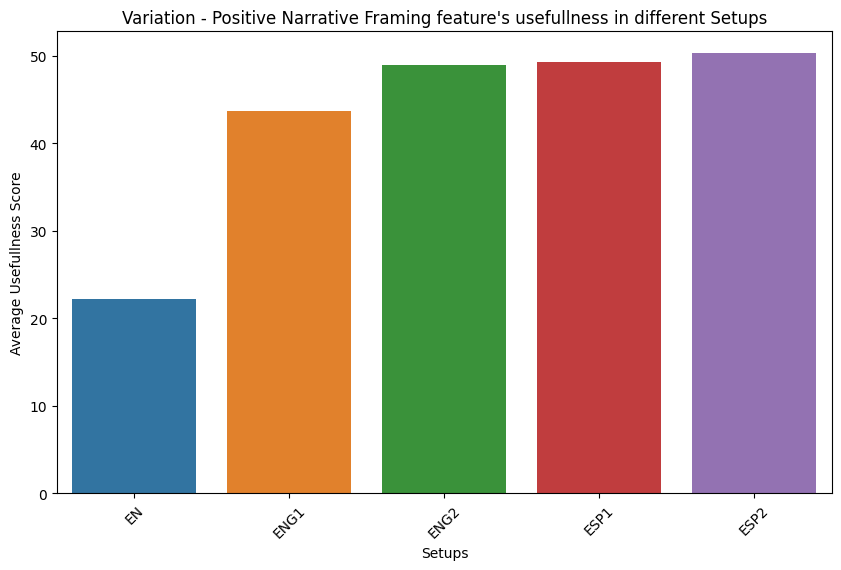

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


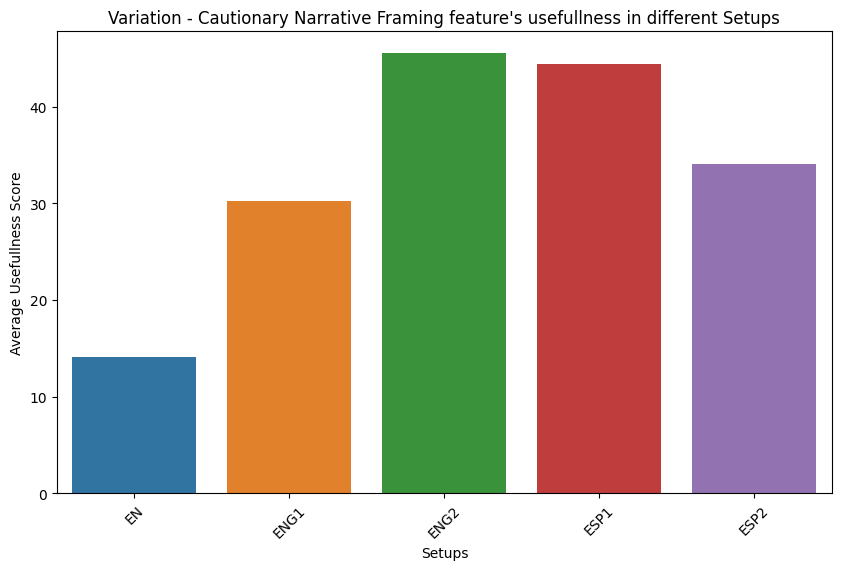

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


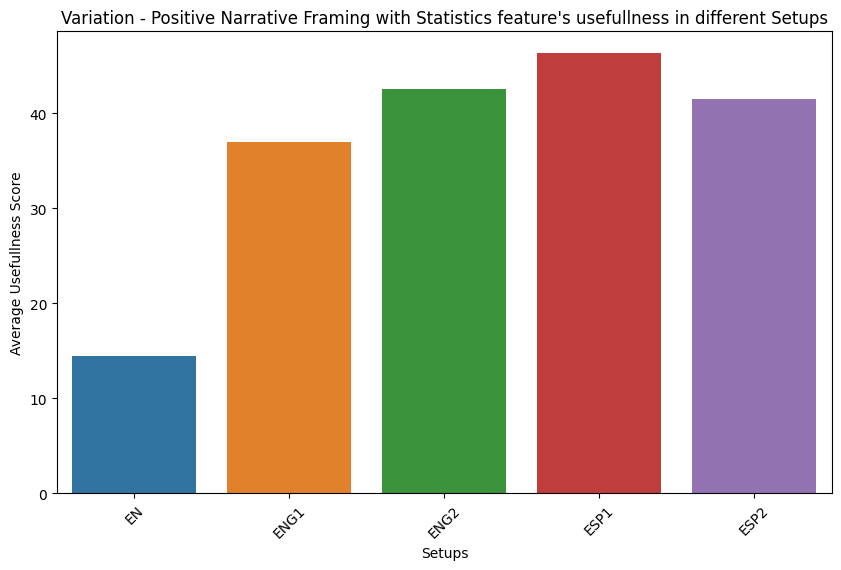

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


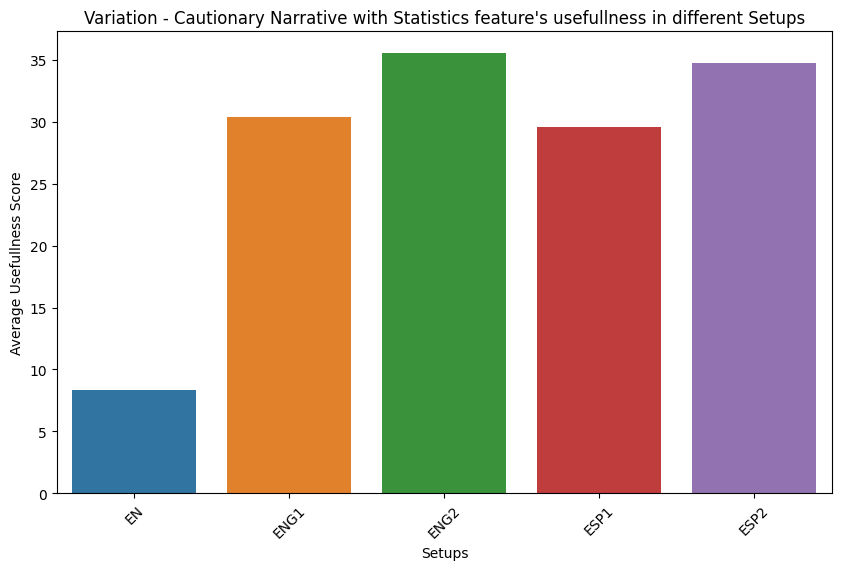

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


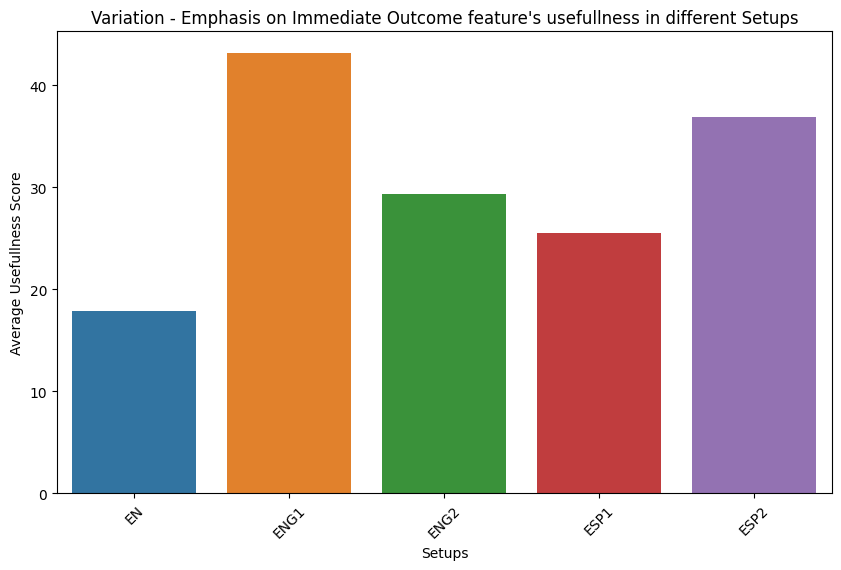

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


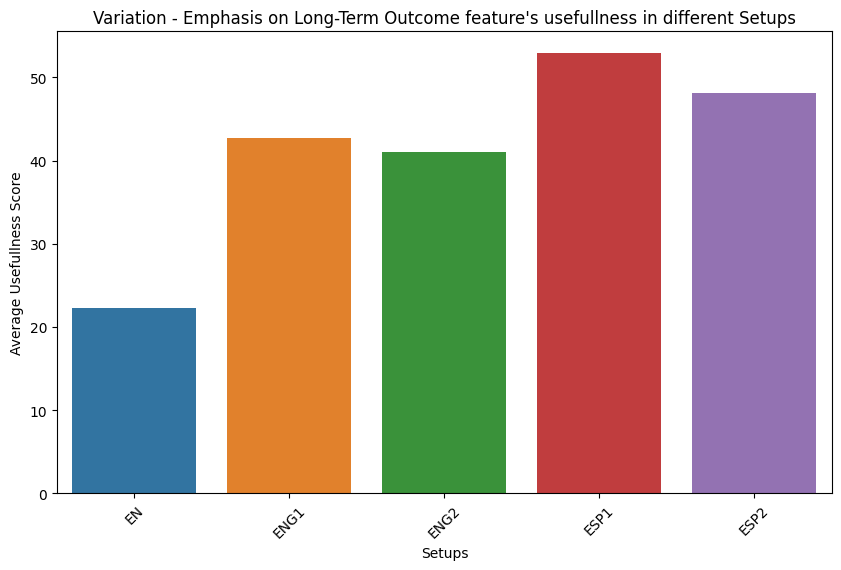

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


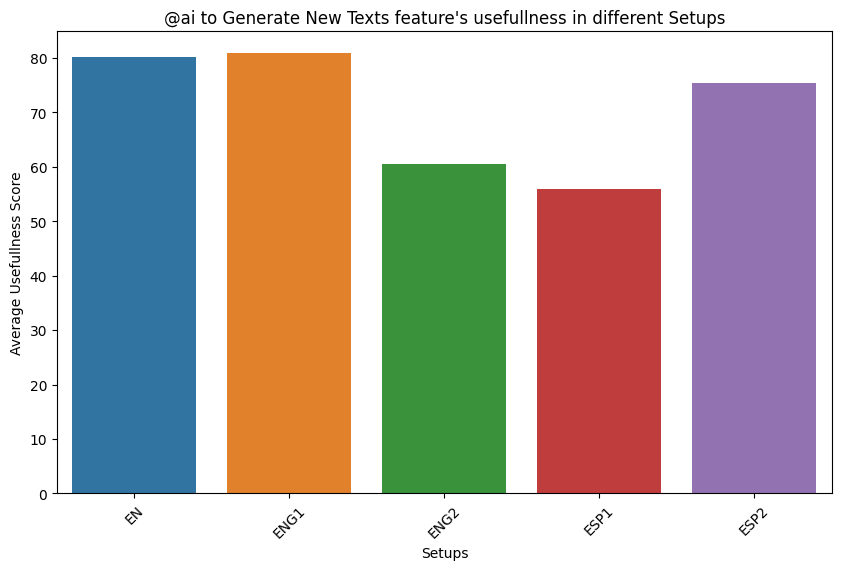

C:\Users\shrey\AppData\Local\Temp\ipykernel_23644\2214742204.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


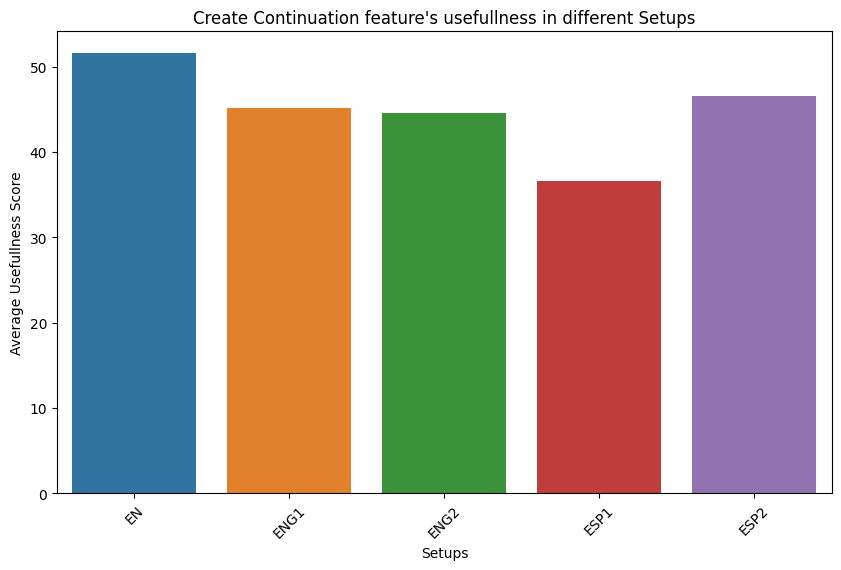

In [31]:



# List of feature columns
grouped_df = final_df[features_task].groupby('TASK_ID').mean().reset_index()

# List of feature columns

# Create a graph for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)
    plt.title(f'{feature_mapping.get(feature)} feature\'s usefullness in different Setups')
    plt.ylabel('Average Usefullness Score')
    plt.xlabel('Setups')
    plt.xticks(rotation=45)
    plt.show()

# backup run

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


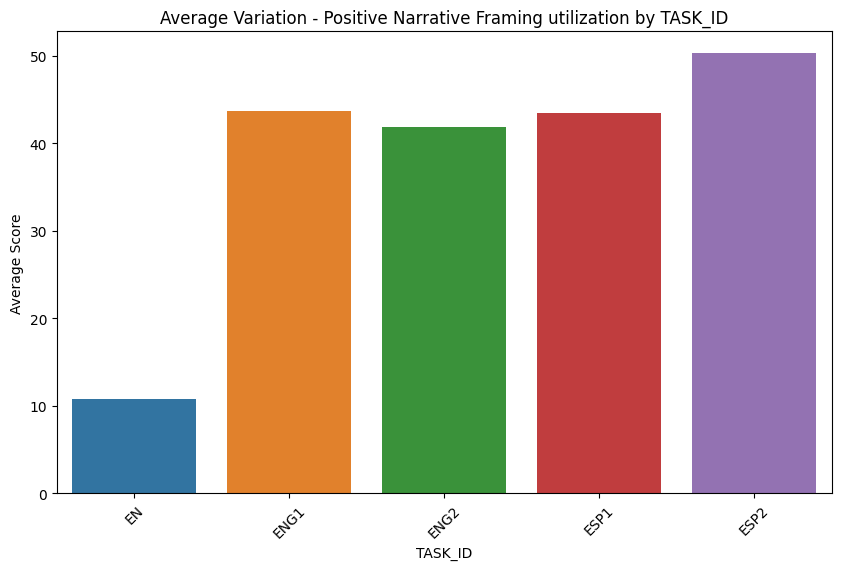

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


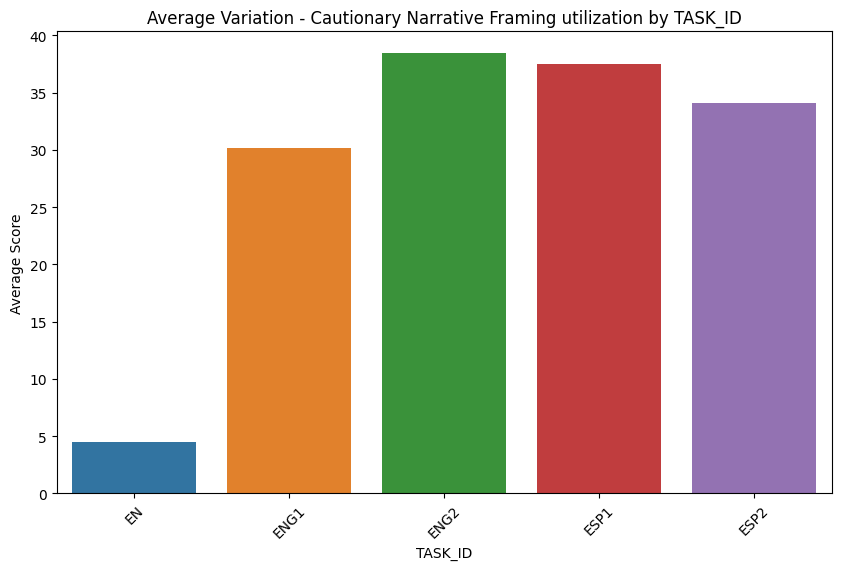

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


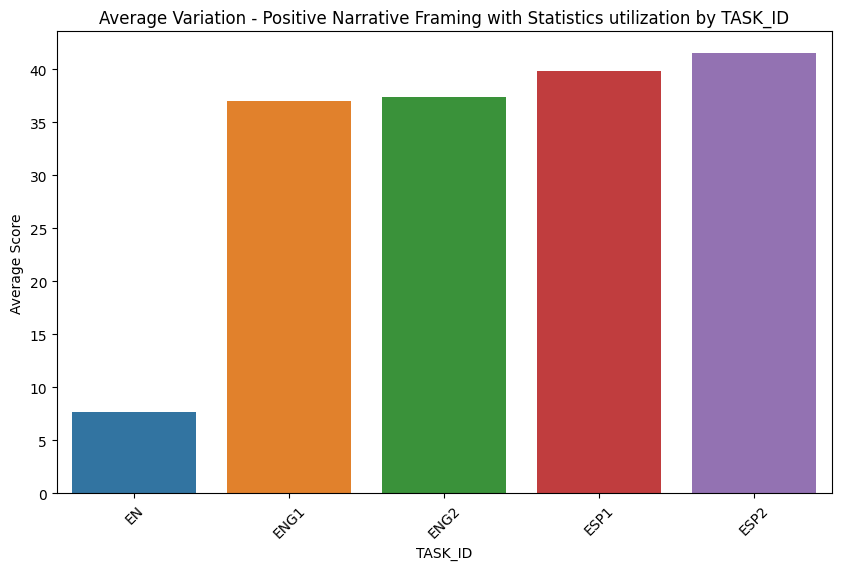

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


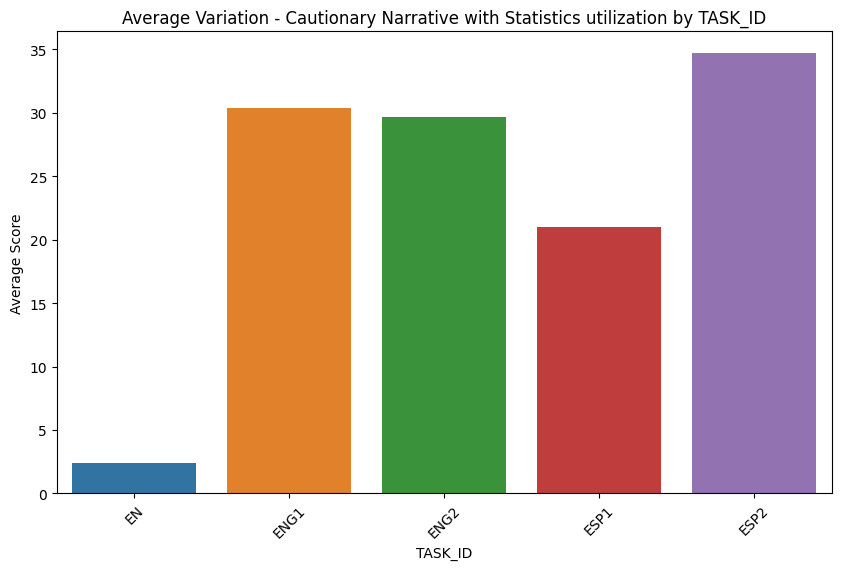

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


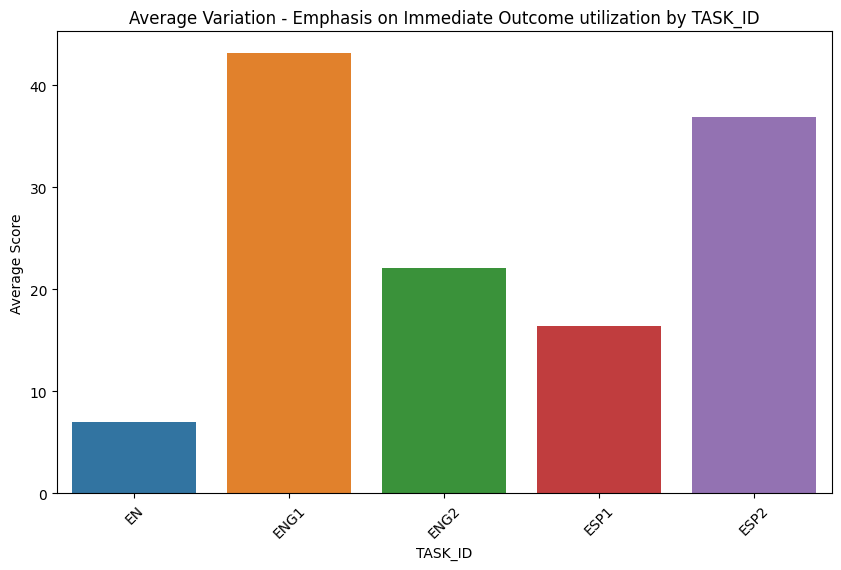

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


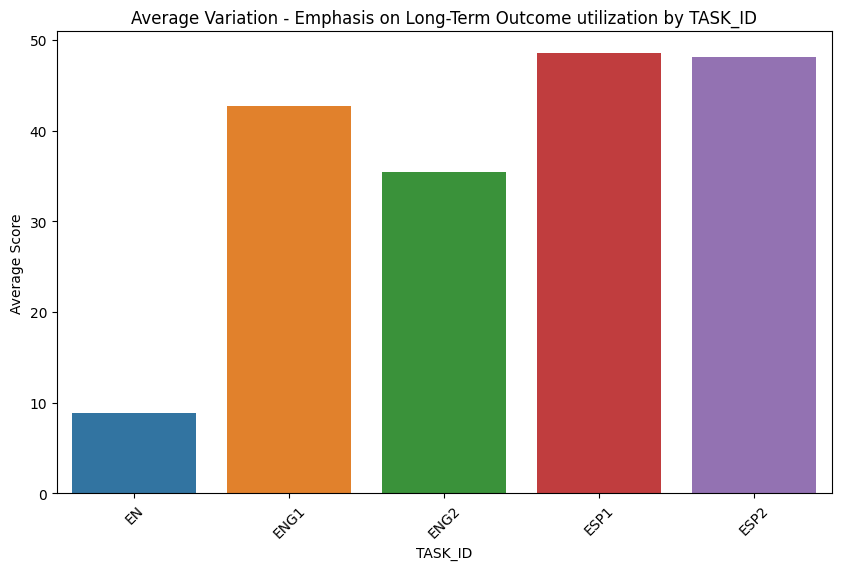

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


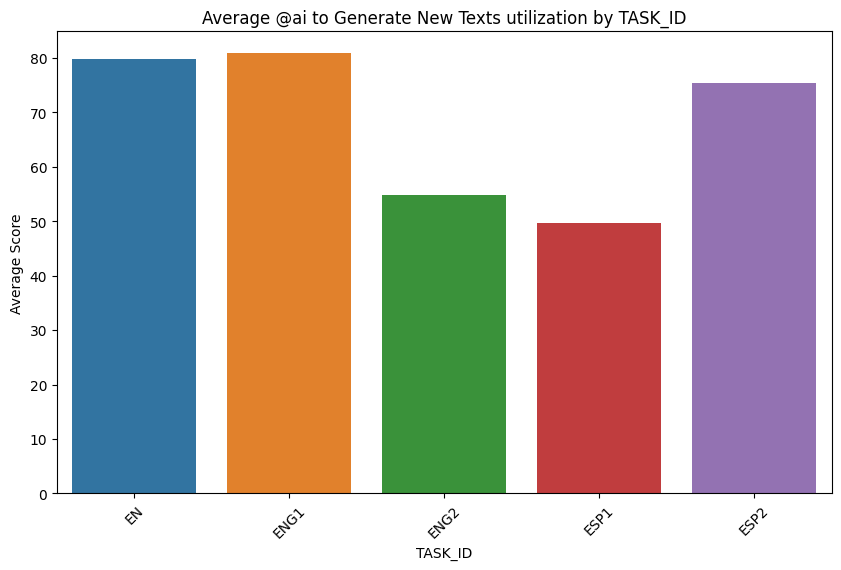

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\4269936884.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)


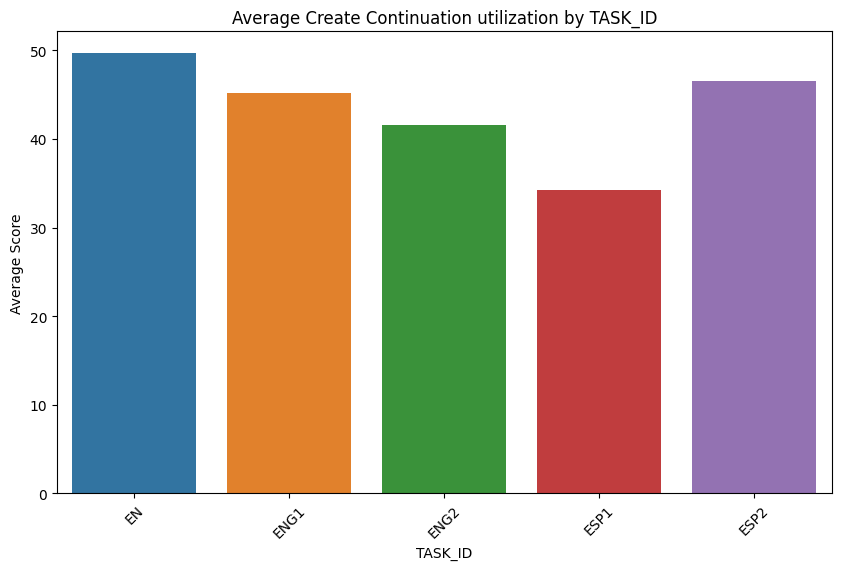

In [ ]:



# List of feature columns
grouped_df = final_df[features_task].groupby('TASK_ID').mean().reset_index()

# List of feature columns

# Create a graph for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TASK_ID', y=feature, data=grouped_df, ci=None)
    plt.title(f'Average {feature_mapping.get(feature)} utilization by TASK_ID')
    plt.ylabel('Average Score')
    plt.xlabel('TASK_ID')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
for category, columns in categories.items():
    for column in columns:
        final_df[column] = pd.to_numeric(final_df[column], errors='coerce')

In [ ]:
likert_cols = ["OWN_1", "OWN_2", "OWN_3"] + ["COLAB_1", "COLAB_2", "COLAB_3"] + ["LM_1", "LM_2", "LM_3", "LM_4"] + ["TASK_ID"]

In [ ]:
final_df[likert_cols]

,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,TASK_ID
0,1,2,1,4,5,2,5,5,5,5,EN
1,5,2,4,4,4,4,4,5,4,4,EN
2,4,2,2,4,5,3,3,4,4,4,EN
3,4,4,4,5,5,2,4,4,4,4,EN
4,5,4,4,4,3,2,3,4,4,3,EN
...,...,...,...,...,...,...,...,...,...,...,...
67,1,1,1,4,5,2,4,4,4,4,ENG2
68,2,2,4,4,2,2,4,4,4,4,ESP1
69,4,4,2,4,4,5,4,4,3,4,ENG2
70,4,4,4,4,4,3,4,4,4,4,ESP1


C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\575679658.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, ci=None)


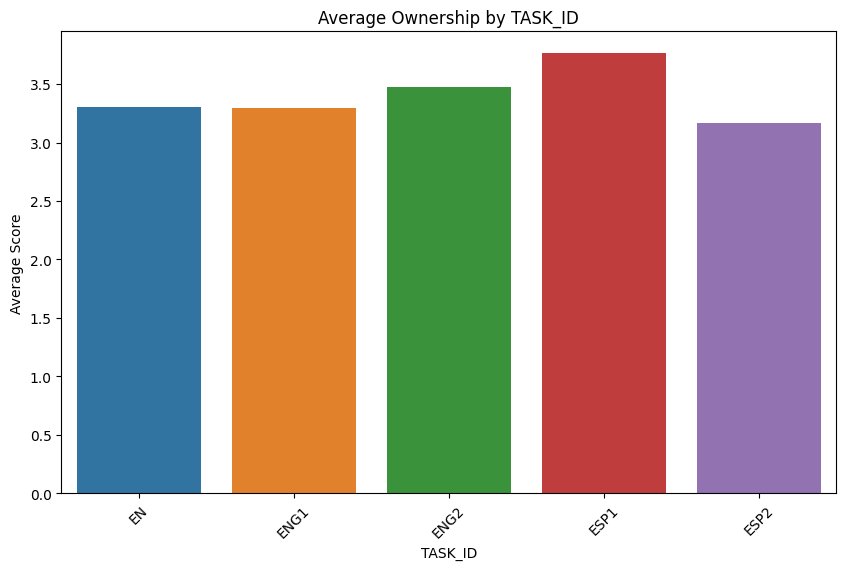

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\575679658.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, ci=None)


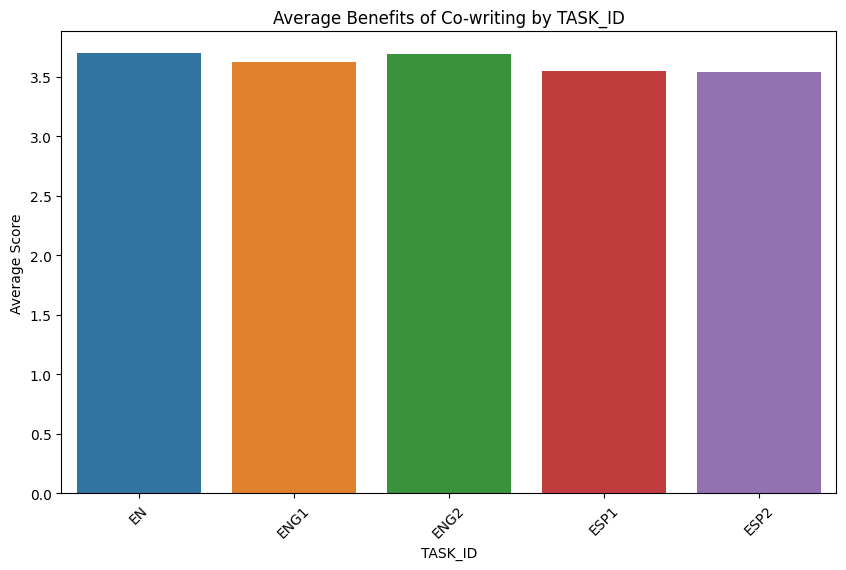

C:\Users\shrey\AppData\Local\Temp\ipykernel_33664\575679658.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, ci=None)


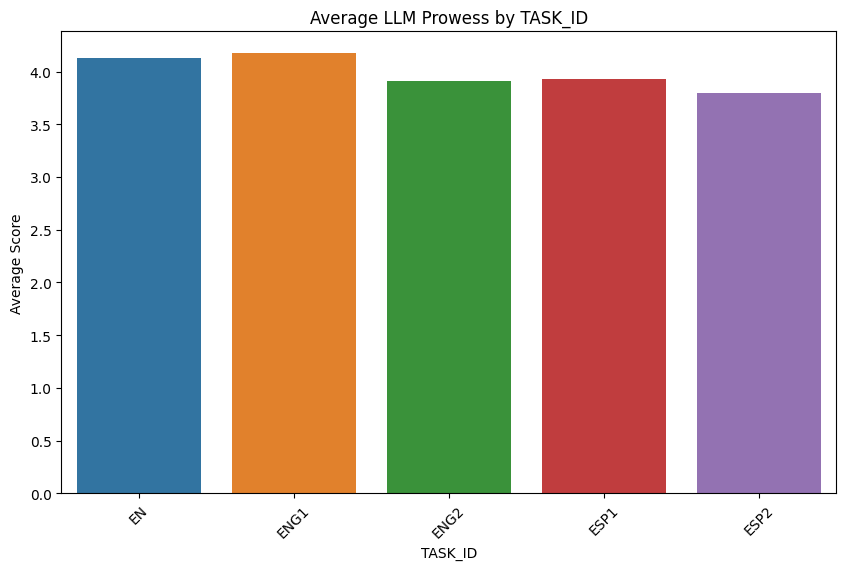

In [ ]:
grouped_df_cat = final_df[likert_cols].groupby('TASK_ID').mean().reset_index()

# Create a graph for each category
for category, columns in categories.items():
    plt.figure(figsize=(10, 6))
    
    # Calculate the mean score for each category by TASK_ID
    category_mean = grouped_df_cat[columns].mean(axis=1)
    
    sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, ci=None)
    plt.title(f'Average {category} by TASK_ID')
    plt.ylabel('Average Score')
    plt.xlabel('TASK_ID')
    plt.xticks(rotation=45)
    plt.show()

# Activity

In [32]:
from collections import Counter


In [33]:
master_activity_df

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,EN
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,EN
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,EN
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,EN
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,EN
...,...,...,...,...,...,...,...,...,...
75,66c7429e6db9c208f260cbec,66c742626db9c208f260cbeb,main_task_1,63ed9dbc1c7838ffcbb42142,"{'buttonClicks': [], 'generatedContent': [{'fe...",3772,2024-08-22 13:52:30.481000+00:00,66c63f502b78911af098063d,ENG2
76,66c74f856db9c208f260cc0f,66c74f216db9c208f260cc0c,main_task_2,60c101e4634ffb1aa797b924,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-22 14:47:33.899000+00:00,66c63f502b78911af098063d,ESP1
77,66c7519f6db9c208f260cc1c,66c750f16db9c208f260cc18,main_task_1,60c101e4634ffb1aa797b924,{'buttonClicks': [{'action': 'CREATE CONTINUAT...,0,2024-08-22 14:56:31.836000+00:00,66c63f502b78911af098063d,ENG2
78,66c758d46db9c208f260cc33,66c757f06db9c208f260cc32,main_task_2,6549030c68f0146d7216bb1c,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-22 15:27:16.063000+00:00,66c63f502b78911af098063d,ESP1


In [34]:
master_activity_df['activity_log'] = master_activity_df['activity_log'].apply(ast.literal_eval)

In [38]:
button_clicks_data = []

# Loop through each row in master_activity_df
for _, row in master_activity_df.iterrows():
    task_id = row['TASK_ID']
    activity_log = row['activity_log']
    study_id = row['study_id']
    # Extract buttonClicks from activity_log
    button_clicks = activity_log.get('buttonClicks', [])
    
    # Count the button click actions
    button_clicks_count = Counter([click['action'] for click in button_clicks])
    
    # Store the task_id and button_clicks_count in the list
    for action, count in button_clicks_count.items():
        button_clicks_data.append({
            'task_id': task_id,
            'study_id': study_id,
            'action': action,
            'count': count
        })

# Convert the list to a DataFrame
button_clicks_df = pd.DataFrame(button_clicks_data)

In [143]:
# task_name_mapping

{('66c516b1d61c7b572205f713', 'main_task_1'): 'EN',
 ('66c5e9afb11bf5c62a286fe8', 'main_task_1'): 'ENG1',
 ('66c5e9afb11bf5c62a286fe8', 'main_task_2'): 'ESP2',
 ('66c616da5ea4ebca7f461ac7', 'main_task_1'): 'ENG1',
 ('66c616da5ea4ebca7f461ac7', 'main_task_2'): 'ESP2',
 ('66c63f4f7c3e886b7c9cc498', 'main_task_1'): 'ENG2',
 ('66c63f4f7c3e886b7c9cc498', 'main_task_2'): 'ESP1',
 ('66c63f502b78911af098063d', 'main_task_1'): 'ENG2',
 ('66c63f502b78911af098063d', 'main_task_2'): 'ESP1'}

In [131]:
# button_clicks_df['task_id'] = button_clicks_df.apply(
#     lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
#     axis=1
# )

In [39]:
button_clicks_df

,task_id,study_id,action,count
0,EN,66c516b1d61c7b572205f713,CREATE VARIATION,5
1,EN,66c516b1d61c7b572205f713,recipe_Gain_Anecdotal,3
2,EN,66c516b1d61c7b572205f713,recipe_LongTerm,1
3,EN,66c516b1d61c7b572205f713,CREATE VARIATION,1
4,EN,66c516b1d61c7b572205f713,recipe_Loss_Statistics,1
...,...,...,...,...
350,ENG2,66c63f502b78911af098063d,recipe_Loss_Anecdotal,1
351,ENG2,66c63f502b78911af098063d,recipe_Gain_Statistics,1
352,ENG2,66c63f502b78911af098063d,recipe_Loss_Statistics,1
353,ENG2,66c63f502b78911af098063d,recipe_ShortTerm,1


In [40]:
grouped_button_clicks_df = button_clicks_df.groupby(['task_id', 'action'])['count'].sum().reset_index()


In [41]:
grouped_button_clicks_df['action'].unique()

array(['', 'CREATE CONTINUATION', 'CREATE VARIATION', 'DELETE CHUNK',
       'DELETE VERSION', 'Make it emotional',
       'Recipe Created: recipe_Kn8KX', 'Recipe Created: recipe_rfQTt',
       'Recipe Created: recipe_wVuAf', 'make it emotional',
       'recipe_Gain_Anecdotal', 'recipe_Gain_Statistics',
       'recipe_LongTerm', 'recipe_Loss_Anecdotal',
       'recipe_Loss_Statistics', 'recipe_ShortTerm', 'recipe_rfQTt',
       'Add Statistics', 'Recipe Created: recipe_GGNBL',
       'Recipe Created: recipe_Wd3O7', 'recipe_GGNBL',
       'Add how their donations will help', 'MAke it more emotional ',
       'Recipe Created: recipe_9LTcT', 'Recipe Created: recipe_LdbXD',
       'Recipe Created: recipe_eXeP5', 'Recipe Created: recipe_hzZ1j',
       'Recipe Created: recipe_jJfQ3', 'Recipe Created: recipe_lWLOH',
       'Recipe Created: recipe_nbdR2', 'Recipe Created: recipe_rUUyL',
       'add a sentence explaining how they contribute.',
       'add consequences', 'add consequences of ext

In [42]:
fileterd_action = grouped_button_clicks_df[grouped_button_clicks_df['action'].isin(['CONTINUATION','recipe_Gain_Anecdotal','recipe_Gain_Statistics', 'recipe_LongTerm','recipe_Loss_Anecdotal', 'recipe_Loss_Statistics','recipe_ShortTerm'])]

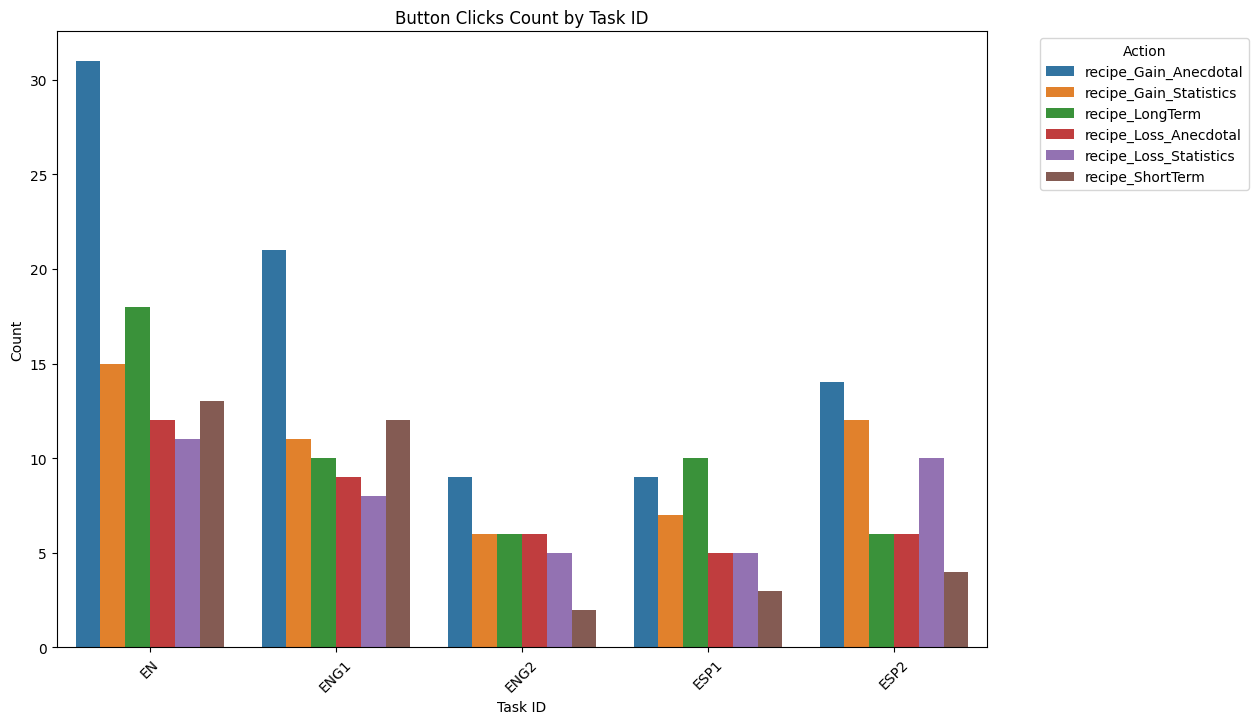

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='count', hue='action', data=fileterd_action)
plt.title('Button Clicks Count by Task ID')
plt.ylabel('Count')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.legend(title='Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Generated Content Percentage

In [ ]:
from difflib import SequenceMatcher

In [186]:
# master_activity_df['task_id'] = master_activity_df.apply(
#     lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
#     axis=1
# )

In [46]:
content_usage = master_activity_df.merge(master_documents_df[["_id",'plain_text','word_count']], left_on='document_id', right_on='_id', how='inner').copy(deep=True)

In [47]:
content_usage['generated'] = content_usage['activity_log'].apply(lambda x: x['generatedContent'])

In [48]:
content_usage['activity_log'].iloc[0]

{'buttonClicks': [{'action': 'CREATE VARIATION',
   'timestamp': '2024-08-21T08:13:42.731Z'},
  {'action': 'recipe_Gain_Anecdotal', 'timestamp': '2024-08-21T08:13:50.256Z'},
  {'action': 'CREATE VARIATION', 'timestamp': '2024-08-21T08:14:23.364Z'},
  {'action': 'CREATE VARIATION', 'timestamp': '2024-08-21T08:14:35.507Z'},
  {'action': 'recipe_Gain_Anecdotal', 'timestamp': '2024-08-21T08:14:37.154Z'},
  {'action': 'CREATE VARIATION', 'timestamp': '2024-08-21T08:14:58.933Z'},
  {'action': 'recipe_Gain_Anecdotal', 'timestamp': '2024-08-21T08:15:00.310Z'},
  {'action': 'CREATE VARIATION', 'timestamp': '2024-08-21T08:15:38.793Z'},
  {'action': 'recipe_LongTerm', 'timestamp': '2024-08-21T08:15:39.969Z'}],
 'generatedContent': [{'feature': '@ai generation',
   'prompt': 'write an advert for WWF\ufeff',
   'response': "Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pres

In [49]:
content_usage['plain_text'].iloc[0]

"Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth. As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.\nBy joining WWF, you'll become part of a global movement that has already made a significant difference in the lives of countless species. For example, just last year, our conservation efforts helped increase the population of endangered sea turtles by 25% on a single island, thanks to the support of dedicated members like you who care about protecting our planet's precious wildlife!\nMembership benefits include: Exclusive updates on conservation projects and news from around the world, invitations to special events and webinars,\xa0 opportunities to

In [50]:
content_usage['generated'].iloc[0]

[{'feature': '@ai generation',
  'prompt': 'write an advert for WWF\ufeff',
  'response': "Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth.As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.Our work focuses on three key areas:1. **Conservation**: Protecting and restoring habitats, addressing climate change, and promoting sustainable development.2. **Education**: Inspiring people to take action through our educational programs, campaigns, and community engagement initiatives.3. **Empowerment**: Supporting local communities in managing their natural resources, ensuring that they benefit from conservation efforts.By joining WWF, you'll become part of a 

# Sequence Matcher method - character level comparison

In [191]:


# Function to calculate the similarity between two strings
def calculate_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Initialize a list to store the similarity results
similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    # Extract the response generated by the '@ai generation' feature
    ai_generation_response = None
    for content in generated_content:
        
        if 'feature' in content and content['feature'] == '@ai generation':
            ai_generation_response = content['response']
            break
    
    # Calculate the similarity if @ai generation response is found
    if ai_generation_response:
        similarity = calculate_similarity(ai_generation_response, plain_text)
    else:
        similarity = None  # or 0 if you prefer
    
    # Store the result
    similarity_results.append(similarity)

# Add the similarity results to the DataFrame
content_usage['ai_plain_text_similarity'] = similarity_results

  task_id  total_similarity
0      EN          1.702984
1    ENG1          1.458250
2    ENG2          0.772261
3    ESP1          1.466682
4    ESP2          1.456858


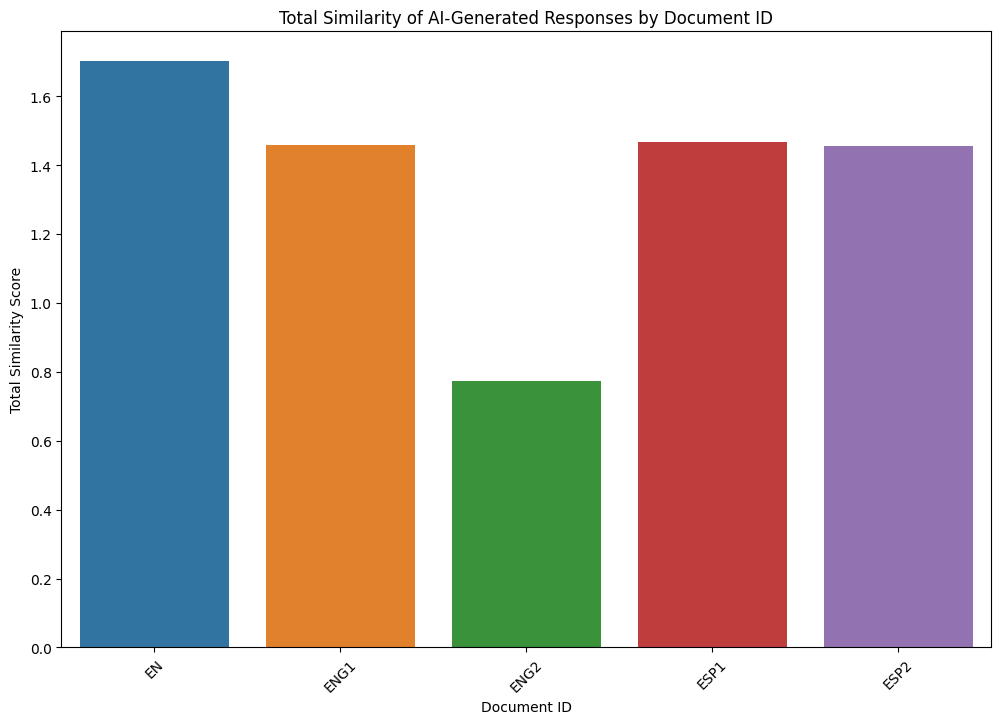

In [204]:
aggregated_similarity = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    document_id = row['document_id']
    plain_text = row['plain_text']
    generated_content = row['generated']
    task_id =  row['task_id']
    # Initialize a variable to accumulate similarity scores
    total_similarity = 0
    
    # Loop through each generated content and calculate similarity
    for content in generated_content:
        response = content['response']
        similarity = calculate_similarity(response, plain_text)
        total_similarity += similarity
    
    # Store the aggregated similarity score for the document
    aggregated_similarity.append({
        'task_id': task_id,
        'document_id': document_id,
        'total_similarity': total_similarity
    })

# Convert the list to a DataFrame
aggregated_similarity_df = pd.DataFrame(aggregated_similarity)

# Aggregate the total similarities by document_id
aggregated_similarity_by_document = aggregated_similarity_df.groupby('task_id')['total_similarity'].mean().reset_index()

# Display the aggregated similarities
print(aggregated_similarity_by_document)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='total_similarity', data=aggregated_similarity_by_document, errorbar="sd")
plt.title('Total Similarity of AI-Generated Responses by Document ID')
plt.ylabel('Total Similarity Score')
plt.xlabel('Document ID')
plt.xticks(rotation=45)
plt.show()

# Word level similarity

In [51]:
def calculate_word_match_percentage(content, response):
    if pd.isna(content) or pd.isna(response):
        return np.nan  # Return NaN if either content or response is NaN
    
    # Split content and response into words
    content_words = set(content.split())
    response_words = set(response.split())
    
    # Calculate the number of matching words
    matching_words = content_words.intersection(response_words)
    
    # Calculate the percentage of matching words
    return (len(matching_words) / len(content_words)) * 100 if len(content_words) > 0 else 0

# Apply the function to each row
# gen['match_percentage'] = gen.apply(lambda row: calculate_word_match_percentage(row['content'], row['response']), axis=1)



similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    # Extract the response generated by the '@ai generation' feature
    ai_generation_response = None
    for content in generated_content:
        
        if 'feature' in content and content['feature'] == '@ai generation':
            ai_generation_response = content['response']
            break
    
    # Calculate the similarity if @ai generation response is found
    if ai_generation_response:
        similarity = calculate_word_match_percentage(ai_generation_response, plain_text)
    else:
        similarity = None  # or 0 if you prefer
    
    # Store the result
    similarity_results.append(similarity)

# Add the similarity results to the DataFrame
content_usage['ai_plain_text_similarity'] = similarity_results

In [55]:
grouped_similarity = content_usage[['TASK_ID','ai_plain_text_similarity']].groupby('TASK_ID')['ai_plain_text_similarity'].mean().reset_index()


In [58]:
grouped_similarity

,TASK_ID,ai_plain_text_similarity
0,EN,54.791365
1,ENG1,70.520350
2,ENG2,74.791772
3,ESP1,61.526364
4,ESP2,57.907462


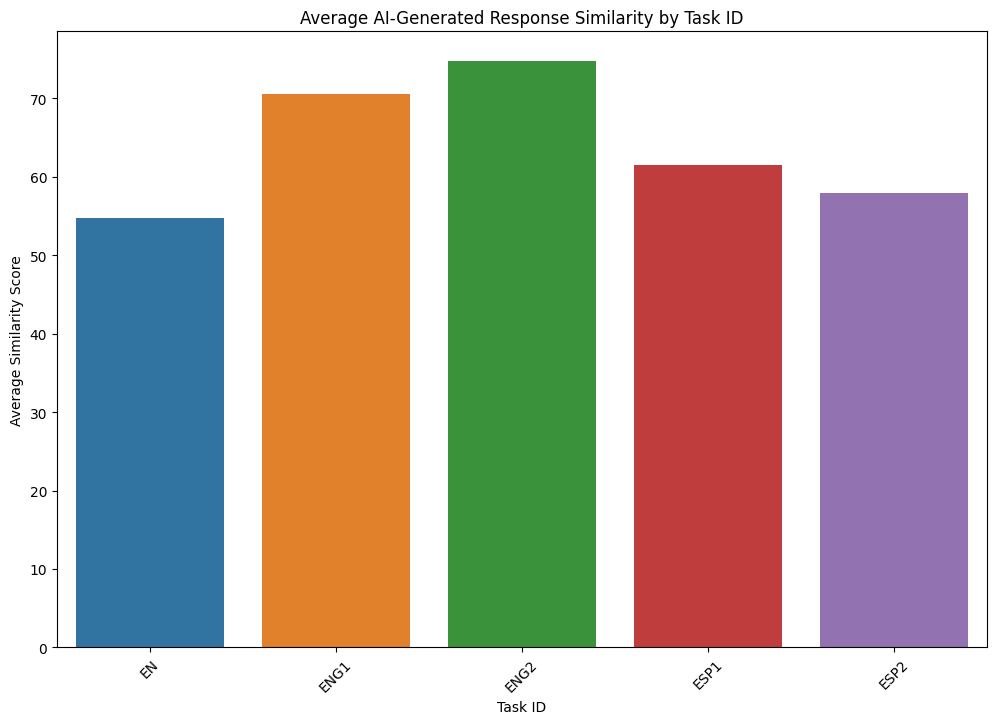

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='ai_plain_text_similarity', data=grouped_similarity, errorbar=None)
plt.title('Average AI-Generated Response Similarity by Task ID')
plt.ylabel('Average Similarity Score')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

# Document Meta

In [155]:
master_documents_df

,_id,content,name,chunks,timestamp,task_id,prolific_id,study_id,plain_text,word_count
0,66c5a13c86c57a87db6f59d9,"<p class=""llmparagraph id0""><span id=""chunk_TD...",NaN,"[{'frontend_id': 'chunk_JfRRo', 'versions': [{...",2024-08-21 08:11:40.473000+00:00,main_task_1,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,Join hands with us in protecting our planet's ...,193
1,66c5e4be2f44d7b54f76e52d,"<p><span class=""chunk factor_9b1tC"" style=""bac...",NaN,"[{'frontend_id': 'chunk_TG1Gd', 'versions': [{...",2024-08-21 12:59:42.981000+00:00,main_task_1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,In a time of uncertainty for the future of our...,167
2,66c5a21086c57a87db6f59e1,"<p class=""llmparagraph id0""><span id=""chunk_AK...",NaN,"[{'frontend_id': 'chunk_AKbWr', 'versions': [{...",2024-08-21 08:15:12.263000+00:00,main_task_1,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,We are at a critical juncture where our inacti...,291
3,66c5a3e386c57a87db6f59f9,"<p class=""llmparagraph id1"">&nbsp;</p>\n<p cla...",NaN,"[{'frontend_id': 'chunk_JAHGD', 'versions': [{...",2024-08-21 08:22:59.626000+00:00,main_task_1,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,\nThe World Wildlife Fund (WWF) is a beacon o...,156
4,66c5a85186c57a87db6f5a21,<p>Join the fight for our planet's future with...,NaN,NaN,2024-08-21 08:41:53.158000+00:00,main_task_1,5f22932ca6ff8f000918fdfb,66c516b1d61c7b572205f713,Join the fight for our planet's future with th...,247
...,...,...,...,...,...,...,...,...,...,...
67,66c742626db9c208f260cbeb,<p>The mission of World Wildlife Fund (WWF) is...,NaN,[],2024-08-22 13:51:30.500000+00:00,main_task_1,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,The mission of World Wildlife Fund (WWF) is to...,110
68,66c74f216db9c208f260cc0c,"<p class=""llmparagraph id0""><span id=""chunk_Oo...",NaN,"[{'frontend_id': 'chunk_Oo0cO', 'versions': [{...",2024-08-22 14:45:53.413000+00:00,main_task_2,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,"Estimados amigos y ciudadanos, En estos moment...",112
69,66c750f16db9c208f260cc18,"<p><span id=""chunk_HQxbc"" class=""chunk factor_...",NaN,"[{'frontend_id': 'chunk_HQxbc', 'versions': [{...",2024-08-22 14:53:37.416000+00:00,main_task_1,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,"By supporting our donation drive, you will not...",359
70,66c757f06db9c208f260cc32,<p>&iexcl;&Uacute;nete a Nosotros para Protege...,NaN,[],2024-08-22 15:23:28.021000+00:00,main_task_2,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,¡Únete a Nosotros para Proteger Nuestro Planet...,177


In [59]:
grouped_word_count = master_documents_df[['TASK_ID','word_count']].groupby('TASK_ID')['word_count'].mean().reset_index()
grouped_word_count

,TASK_ID,word_count
0,EN,194.8750
1,ENG1,250.1250
2,ENG2,177.0000
3,ESP1,158.8125
4,ESP2,193.4375


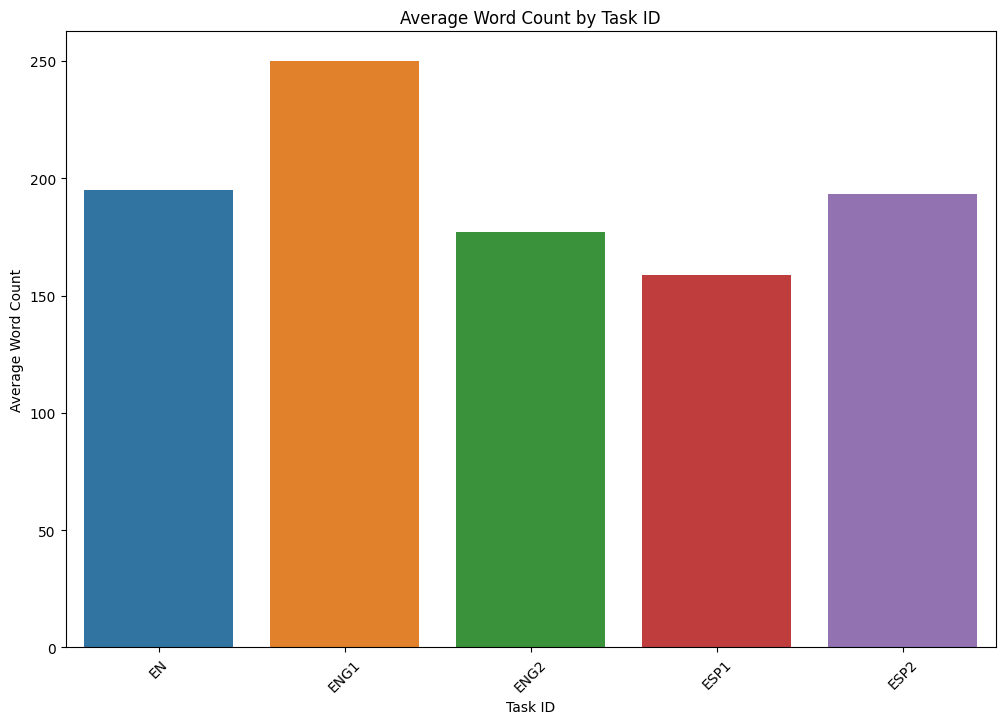

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='word_count', data=grouped_word_count, errorbar=None)
plt.title('Average Word Count by Task ID')
plt.ylabel('Average Word Count')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()